In [1]:
import os
import numpy as np
import zipfile
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [5]:
# Define the training and validation base directories
train_dir = './data/train'
val_dir = './data/val'

labels = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]
print(labels)

['Ayam', 'Brokoli', 'Jagung', 'Kacang tanah', 'Kangkung', 'Kentang', 'Labu', 'Labu Siam', 'Lobak Merah', 'Mentimun', 'Nanas', 'Nangka', 'Nasi putih', 'Paprika', 'Pare', 'Pepaya', 'Pisang', 'Singkong', 'Tahu', 'Telur', 'Tempe', 'Terong', 'Tomat', 'Ubi', 'Wortel']


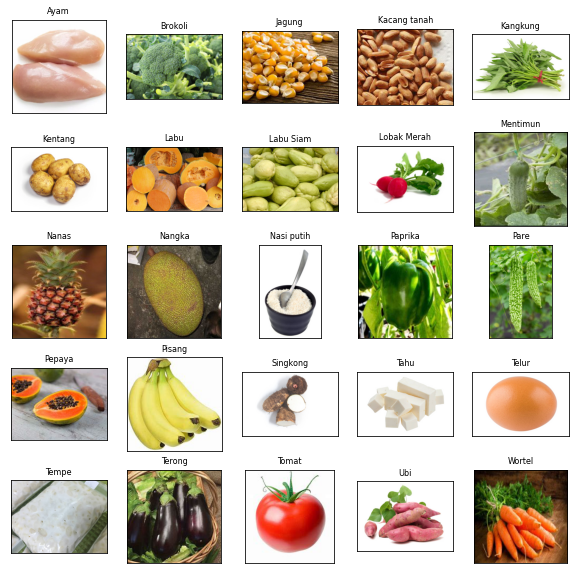

In [6]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))

# Loop through each subplot and display image
for row in range(5):
    for col in range(5):
        label = labels[row*5+col]
        img = load_img(f"{os.path.join(os.path.join(train_dir, label), os.listdir(os.path.join(train_dir, label))[0])}")
        # Display the image with its label
        axs[row][col].imshow(img)
        axs[row][col].set_title(label, fontsize=8)
        axs[row][col].set_xticks([])
        axs[row][col].set_yticks([])
        
# Show the plot
plt.show()

In [7]:
for i in range(len(labels)):
    # Load the first example of a ingredient
    sample_image  = load_img(f"{os.path.join(os.path.join(train_dir, labels[i]), os.listdir(os.path.join(train_dir, labels[i]))[0])}")

    # Convert the image into its numpy array representation
    sample_array = img_to_array(sample_image)

    print(f"image has shape: {sample_array.shape}")

image has shape: (500, 500, 3)
image has shape: (408, 612, 3)
image has shape: (182, 243, 3)
image has shape: (180, 228, 3)
image has shape: (408, 612, 3)
image has shape: (405, 612, 3)
image has shape: (408, 612, 3)
image has shape: (405, 612, 3)
image has shape: (424, 612, 3)
image has shape: (128, 128, 3)
image has shape: (128, 128, 3)
image has shape: (256, 256, 3)
image has shape: (612, 406, 3)
image has shape: (128, 128, 3)
image has shape: (612, 408, 3)
image has shape: (184, 245, 3)
image has shape: (181, 183, 3)
image has shape: (408, 612, 3)
image has shape: (408, 612, 3)
image has shape: (408, 612, 3)
image has shape: (459, 612, 3)
image has shape: (195, 195, 3)
image has shape: (180, 171, 3)
image has shape: (445, 612, 3)
image has shape: (128, 128, 3)


In [8]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Instantiate the ImageDataGenerator class 
    # normalize pixel values and set arguments to augment the images 
    train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32, 
                                                      class_mode='categorical',
                                                      target_size=(300, 300))
    
    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    # Remember that validation data should not be augmented
    validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                    batch_size=32, 
                                                                    class_mode='categorical',
                                                                    target_size=(300, 300))

    return train_generator, validation_generator

In [19]:
# Test generators
train_generator, validation_generator = train_val_generators(train_dir, val_dir)

Found 8793 images belonging to 25 classes.
Found 2218 images belonging to 25 classes.


In [34]:
# Import the inception model  
from tensorflow.keras.applications.inception_v3 import InceptionV3
     
# # Create an instance of the inception model from the local pre-trained weights
# local_weights_file = './pre-trained-model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [35]:
pre_trained_model = InceptionV3(input_shape = (300, 300, 3),
                                  include_top = False, 
                                  weights = 'imagenet') 

for layer in pre_trained_model.layers:
    layer.trainable = False

#         pre_trained_model

In [36]:
# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_473 (Conv2D)            (None, 149, 149, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_470 (Batch  (None, 149, 149, 32  96         ['conv2d_473[0][0]']             
 Normalization)                 )                                                      

 conv2d_484 (Conv2D)            (None, 35, 35, 32)   6144        ['average_pooling2d_45[0][0]']   
                                                                                                  
 batch_normalization_475 (Batch  (None, 35, 35, 64)  192         ['conv2d_478[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_477 (Batch  (None, 35, 35, 64)  192         ['conv2d_480[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_480 (Batch  (None, 35, 35, 96)  288         ['conv2d_483[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 conv2d_495 (Conv2D)            (None, 35, 35, 64)   18432       ['mixed1[0][0]']                 
                                                                                                  
 batch_normalization_492 (Batch  (None, 35, 35, 64)  192         ['conv2d_495[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_492 (Activation)    (None, 35, 35, 64)   0           ['batch_normalization_492[0][0]']
                                                                                                  
 conv2d_493 (Conv2D)            (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_49

                                                                                                  
 activation_499 (Activation)    (None, 17, 17, 96)   0           ['batch_normalization_499[0][0]']
                                                                                                  
 max_pooling2d_22 (MaxPooling2D  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
 )                                                                                                
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_496[0][0]',         
                                                                  'activation_499[0][0]',         
                                                                  'max_pooling2d_22[0][0]']       
                                                                                                  
 conv2d_50

 mixed4 (Concatenate)           (None, 17, 17, 768)  0           ['activation_500[0][0]',         
                                                                  'activation_503[0][0]',         
                                                                  'activation_508[0][0]',         
                                                                  'activation_509[0][0]']         
                                                                                                  
 conv2d_517 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_514 (Batch  (None, 17, 17, 160)  480        ['conv2d_517[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_527 (Conv2D)            (None, 17, 17, 160)  122880      ['mixed5[0][0]']                 
                                                                                                  
 batch_normalization_524 (Batch  (None, 17, 17, 160)  480        ['conv2d_527[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_524 (Activation)    (None, 17, 17, 160)  0           ['batch_normalization_524[0][0]']
                                                                                                  
 conv2d_528 (Conv2D)            (None, 17, 17, 160)  179200      ['activation_524[0][0]']         
                                                                                                  
 batch_normalization_525 (Batch  (None, 17, 17, 160)  480        ['conv2d_528[0][0]']             
 Normaliza

 activation_534 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_534[0][0]']
                                                                                                  
 conv2d_538 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_534[0][0]']         
                                                                                                  
 batch_normalization_535 (Batch  (None, 17, 17, 192)  576        ['conv2d_538[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_535 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_535[0][0]']
                                                                                                  
 conv2d_534 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
          

 Normalization)                                                                                   
                                                                                                  
 activation_543 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_543[0][0]']
                                                                                                  
 conv2d_543 (Conv2D)            (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_547 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_543[0][0]']         
                                                                                                  
 batch_normalization_540 (Batch  (None, 17, 17, 192)  576        ['conv2d_543[0][0]']             
 Normalization)                                                                                   
          

 Normalization)                                                                                   
                                                                                                  
 conv2d_557 (Conv2D)            (None, 8, 8, 192)    245760      ['average_pooling2d_52[0][0]']   
                                                                                                  
 batch_normalization_546 (Batch  (None, 8, 8, 320)   960         ['conv2d_549[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_548 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_548[0][0]']
                                                                                                  
 activation_549 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_549[0][0]']
          

                                                                                                  
 activation_557 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_557[0][0]']
                                                                                                  
 activation_558 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_558[0][0]']
                                                                                                  
 activation_561 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_561[0][0]']
                                                                                                  
 activation_562 (Activation)    (None, 8, 8, 384)    0           ['batch_normalization_562[0][0]']
                                                                                                  
 batch_normalization_563 (Batch  (None, 8, 8, 192)   576         ['conv2d_566[0][0]']             
 Normaliza

In [37]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [38]:
output = pre_trained_model.output
print(output)

KerasTensor(type_spec=TensorSpec(shape=(None, 8, 8, 2048), dtype=tf.float32, name=None), name='mixed10/concat:0', description="created by layer 'mixed10'")


In [39]:
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.engine.functional.Functional'>


In [51]:
def create_final_model(pre_trained_model, output):
    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(output)
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    predictions = tf.keras.layers.Dense(25, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [52]:
# Save model in a variable
model = create_final_model(pre_trained_model, output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 23,001,785 total parameters in this model.
There are 1,199,001 trainable parameters in this model.


In [53]:
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 20,
                    verbose = 1)

Epoch 1/20
275/275 [==============================] - 144s 513ms/step - loss: 1.4182 - accuracy: 0.6055 - val_loss: 0.6664 - val_accuracy: 0.8057
Epoch 2/20
275/275 [==============================] - 140s 507ms/step - loss: 0.5986 - accuracy: 0.8269 - val_loss: 0.4472 - val_accuracy: 0.8647
Epoch 3/20
275/275 [==============================] - 139s 504ms/step - loss: 0.4792 - accuracy: 0.8600 - val_loss: 0.4028 - val_accuracy: 0.8904
Epoch 4/20
275/275 [==============================] - 140s 509ms/step - loss: 0.4185 - accuracy: 0.8794 - val_loss: 0.4500 - val_accuracy: 0.8832
Epoch 5/20
275/275 [==============================] - 140s 510ms/step - loss: 0.3872 - accuracy: 0.8854 - val_loss: 0.3910 - val_accuracy: 0.8954
Epoch 6/20
275/275 [==============================] - 140s 509ms/step - loss: 0.3426 - accuracy: 0.8968 - val_loss: 0.4000 - val_accuracy: 0.8931
Epoch 7/20
275/275 [==============================] - 140s 509ms/step - loss: 0.3146 - accuracy: 0.9089 - val_loss: 0.4358 -

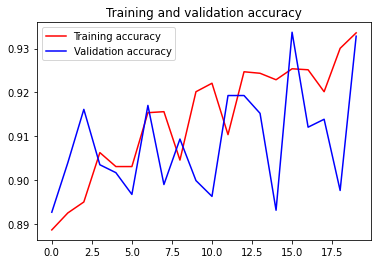

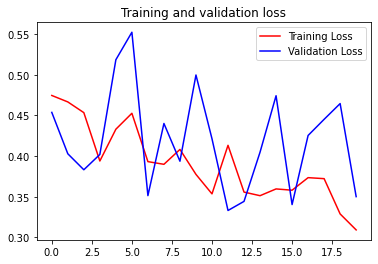

In [33]:
# Plot the chart for accuracy and loss on both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [86]:
def test_img(path):
    img = load_img(path, target_size=(300, 300))
    x = img_to_array(img) 
    x = np.expand_dims(x, axis=0)
    x /= 255. 
    class_probabilities = model.predict(x) 
    plt.imshow(img)
    plt.show()
    class_names = list(train_generator.class_indices.keys()) 
    for (label, p) in zip(class_names, class_probabilities[0]):
        print(""(str(label), p * 100))

1/1 [==============================] - 0s 24ms/step


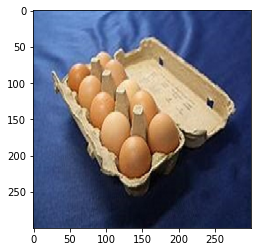

('Ayam', 5.916527204522819e-17)
('Brokoli', 1.4998460372978029e-10)
('Jagung', 4.44697265122862e-09)
('Kacang tanah', 4.899758983961666e-12)
('Kangkung', 6.189506237186046e-12)
('Kentang', 1.2419056893975267e-07)
('Labu', 1.8409714641620667e-05)
('Labu Siam', 5.6670458756385186e-14)
('Lobak Merah', 9.993115709927558e-10)
('Mentimun', 2.4297748261645734e-12)
('Nanas', 1.8772535526068168e-06)
('Nangka', 5.050320784402013e-12)
('Nasi putih', 5.741801348616016e-11)
('Paprika', 1.6453468887231383e-13)
('Pare', 3.5344876981799334e-11)
('Pepaya', 4.511870738133084e-09)
('Pisang', 2.0801310895990355e-06)
('Singkong', 4.545133019950853e-09)
('Tahu', 2.1345264965277888e-10)
('Telur', 99.99997615814209)
('Tempe', 6.0707745796508006e-12)
('Terong', 5.367158540520167e-11)
('Tomat', 1.9379959859122664e-07)
('Ubi', 6.343616495811666e-11)
('Wortel', 9.6265764457093e-10)


In [89]:
test_img('./telur.jpg')

1/1 [==============================] - 0s 25ms/step


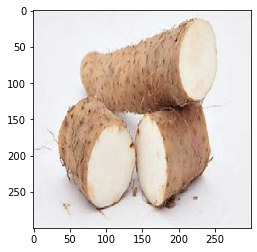

('Ayam', 3.4652850033900506e-08)
('Brokoli', 8.823543905613941e-13)
('Jagung', 1.4825076929958492e-11)
('Kacang tanah', 2.068160576129685e-06)
('Kangkung', 1.9665244181465502e-13)
('Kentang', 2.944993207631974e-10)
('Labu', 2.141451227193785e-14)
('Labu Siam', 3.536254067348921e-08)
('Lobak Merah', 7.100093591132142e-13)
('Mentimun', 5.742023301280597e-07)
('Nanas', 1.2136917339200526e-09)
('Nangka', 2.0747339402049647e-07)
('Nasi putih', 2.1974224523324537e-09)
('Paprika', 9.611868999294046e-13)
('Pare', 1.2335601984325706e-08)
('Pepaya', 2.9963504635501176e-13)
('Pisang', 1.2328510656800518e-06)
('Singkong', 99.99982118606567)
('Tahu', 2.997388559577985e-07)
('Telur', 1.1082908630631307e-14)
('Tempe', 7.0109905436765985e-06)
('Terong', 1.5532114261418428e-06)
('Tomat', 4.441523034648754e-17)
('Ubi', 0.00016789786059234757)
('Wortel', 2.47354610752315e-10)


In [91]:
test_img('./singkong.jpg')

### To h5

In [92]:
model.save('model_capstone.h5')

### To tflite

In [93]:
tf.saved_model.save(model, 'saved_model')

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


In [94]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

In [95]:
tflite_model_file = 'model_capstone.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)